In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.metrics import accuracy_score

In [2]:
def define_axes(X):
  min1,max1 = X[:,0].min(),X[:,0].max()
  min2,max2 = X[:,1].min(),X[:,1].max()
  return [min1-.1,max1+.1,min2-.1,max2+.1]
  
def plotdataset(X,y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y == k],X[:,1][y==k],'o',alpha=0.3)

def plotPredictions(clf,X):
  axes = define_axes(X)
  x0s = np.linspace(axes[0],axes[1],100)
  x1s = np.linspace(axes[2],axes[3],100)
  x0,x1 = np.meshgrid(x0s,x1s)
  X = np.c_[x0.ravel(),x1.ravel()]
  ypred = clf.predict(X).reshape(x0.shape)
  plt.contourf(x0,x1,ypred,cmap=plt.cm.brg,alpha = 0.2)

In [3]:
def criaDataset(n=200, n_classes=4):
  X, y = make_blobs(n_samples=n, centers=n_classes * 2, cluster_std=0.8)
  
  y = np.array(y % n_classes, dtype= int)
  
  return X, y

In [8]:
X,y = criaDataset(n_classes=4,n=2000)

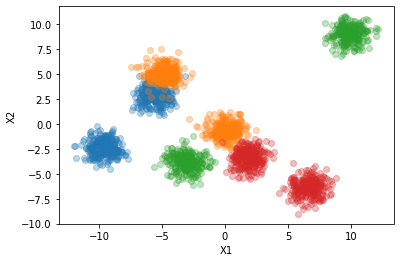

In [9]:
plotdataset(X,y)

In [10]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=.9)

In [11]:
def encodetarget(y_):
  labels, ids = np.unique(y_, return_inverse=True)
  return keras.utils.to_categorical(ids) 

In [12]:
class MLP(BaseEstimator, ClassifierMixin):
    """
     MLP utilizando o  Keras com:
     N camadas ocultas;
     N neurônios;
     e com classificação binária e multiclasses.  
    """

    def __init__(self, max_iter=200, n_hidden=[(64,'relu')]):
        self.max_iter = max_iter
        self.n_hidden = n_hidden

    def cria_modelo(self, X_, y_):
      labels, ids = np.unique(y_, return_inverse=True)
      yhot = keras.utils.to_categorical(ids)
      # create model
      self.model = keras.models.Sequential()
      self.model.add(keras.layers.InputLayer(input_shape=(X_.shape[1],)))
      for h in self.n_hidden:
        self.model.add(keras.layers.Dense(h[0],activation=h[1]))

      self.model.add(keras.layers.Dense(yhot.shape[1],activation='softmax'))
      # Compile model
      self.model.compile(loss='binary_crossentropy', metrics=['accuracy'])
      print(self.model.summary())
      return self.model


    def predict_proba(self, X, y=None):
        return self.model.predict(X)
    
    def predict(self, X, y=None):
        predictions = self.model.predict(X)
        return self.labels[np.argmax(predictions,axis=1)]

In [ ]:
parametros = [(128,'relu'),(64,'relu'),(64,'relu'),(64,'relu'),(32,'relu')]
model = KerasClassifier(build_fn=lambda: MLP(n_hidden=parametros).cria_modelo(Xtr,ytr), 
                        epochs=700, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 19,172
Trainable params: 19,172
Non-traina

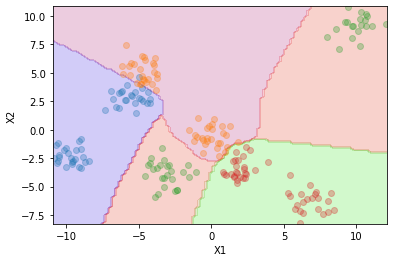

In [14]:
model.fit(Xtr, encodetarget(ytr))
plotdataset(Xtr,ytr)
plotPredictions(model,Xtr)
print("Acurácia Treino:",accuracy_score(ytr, model.predict(Xtr)))

Acurácia Teste: 0.9827777777777778


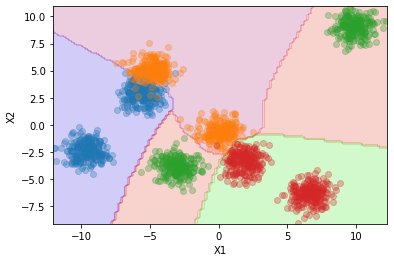

In [15]:
plotdataset(Xte,yte)
plotPredictions(model,Xte)
print("Acurácia Teste:",accuracy_score(yte, model.predict(Xte)))